In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [61]:
runs = pd.read_csv("../csv_logs/log_ffn.csv")

In [62]:
runs.drop(["time", "nesterov"], axis = 1, inplace = True)

In [63]:
count_layers = lambda x: len(x.split(","))
runs["depth"] = runs["layers"].map(count_layers)
runs

,epoch,model,param_count,layers,optimizer,loss,lr,momentum,decay,acc,loss.1,val_acc,val_loss,depth
0,0,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.490881,0.1,0.9,0.01,0.11868,6.490881,0.1365,6.173112,2
1,1,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.169778,0.1,0.9,0.01,0.14744,6.169778,0.1544,6.167881,2
2,2,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.166144,0.1,0.9,0.01,0.16480,6.166144,0.1703,6.165075,2
3,3,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.163757,0.1,0.9,0.01,0.17626,6.163757,0.1795,6.163137,2
4,4,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.162014,0.1,0.9,0.01,0.18486,6.162014,0.1891,6.161649,2
5,5,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.160635,0.1,0.9,0.01,0.19090,6.160635,0.1945,6.160435,2
6,6,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.159487,0.1,0.9,0.01,0.19494,6.159487,0.1962,6.159406,2
7,7,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.158501,0.1,0.9,0.01,0.19824,6.158501,0.1986,6.158511,2
8,8,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.157637,0.1,0.9,0.01,0.20094,6.157637,0.2019,6.157717,2
9,9,ffn0,30730,[<keras.layers.core.Dense object at 0x11d64a49...,<keras.optimizers.SGD object at 0x10dad4e50>,6.156868,0.1,0.9,0.01,0.20278,6.156868,0.2037,6.157006,2


In [64]:
runs.head()
model_performance = runs.groupby("model")["val_acc", "depth"].max()
model_performance["id"] = range(1, model_performance.shape[0] + 1)
model_performance.reset_index(inplace = True)
model_performance

,model,val_acc,depth,id
0,ffn0,0.2037,2,1
1,ffn1,0.1008,4,2
2,ffn2,0.1000,6,3
3,ffn2alt,0.4382,6,4
4,ffn3,0.1000,8,5
5,ffn4,0.4787,8,6
6,ffn5,0.4948,10,7
7,ffn6,0.4961,12,8


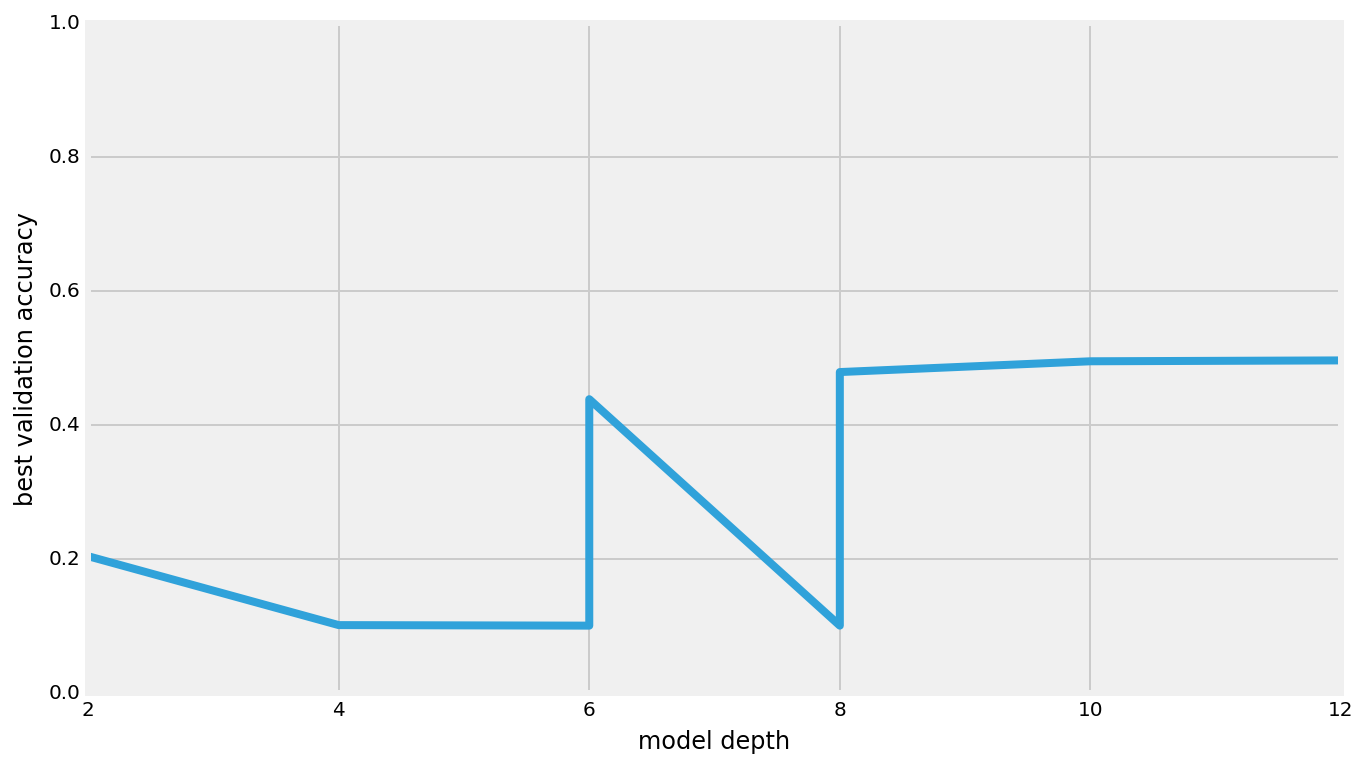

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(model_performance["depth"], model_performance["val_acc"])
ax.set_ylim([0,1])
ax.set_xlabel('model depth')
ax.set_ylabel('best validation accuracy')
plt.show()

Perameter info:
- All activations ReLu with a final softmax activation
- SGD 
    - intial learning rate of 0.1 with a 10% decay per epoch
    - momentum of 0.9
- The first model (depth 2) was the exception, it had a final ReLu activation, otherwise it was stuck at 10% validation accuracy
- Note: the model that dips at depth 8 had a 256 unit wide penultimate layer, when that was upped to 512 performance returned to ~40%

In [66]:
paramcount = runs.groupby("model")["val_acc", "param_count"].max()
paramcount

,val_acc,param_count
model,,
ffn0,0.2037,30730
ffn1,0.1008,3157002
ffn2,0.1000,4206602
ffn2alt,0.4382,4206602
ffn3,0.1000,4461322
ffn4,0.4787,5256202
ffn5,0.4948,6305802
ffn6,0.4961,6825482


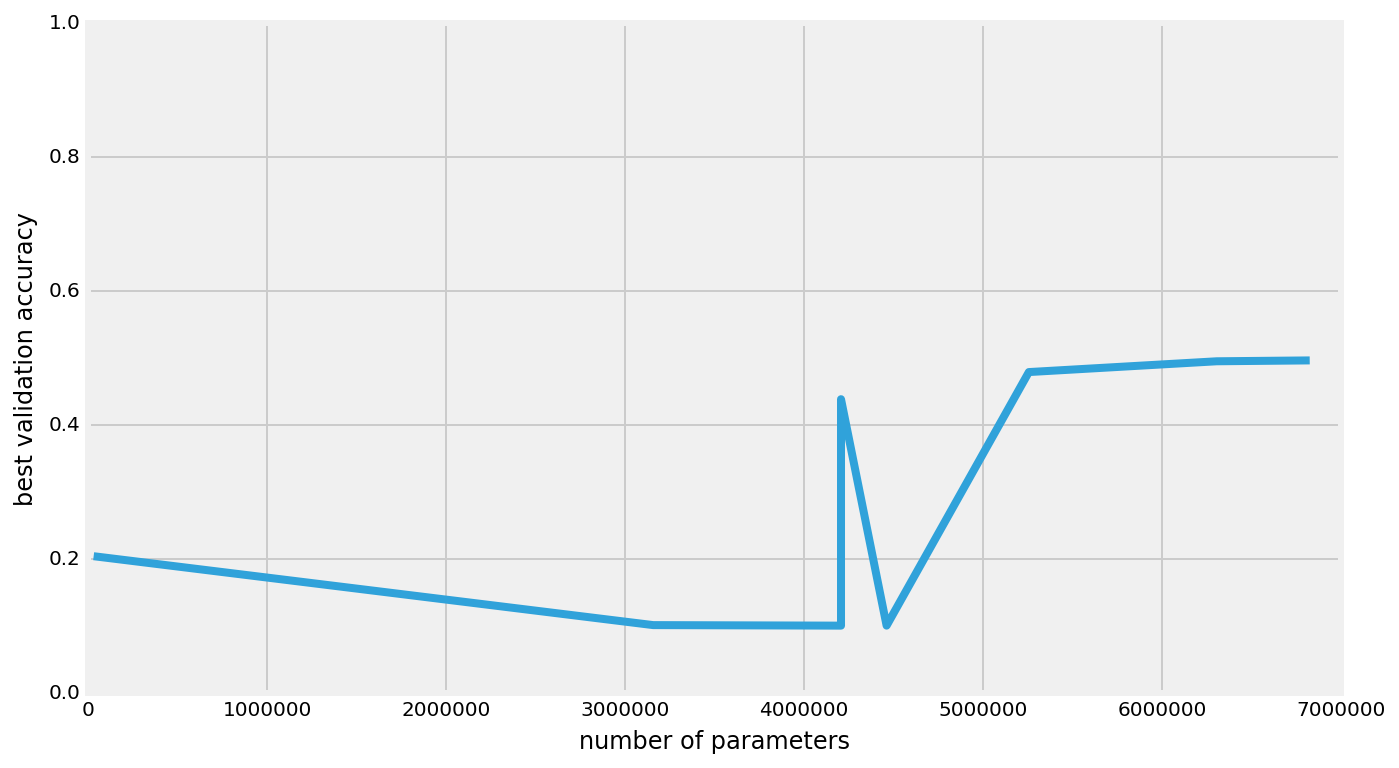

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(paramcount["param_count"], paramcount["val_acc"])
ax.set_ylim([0,1])
ax.set_xlabel('number of parameters')
ax.set_ylabel('best validation accuracy')
plt.show()

In [61]:
adam = pd.read_csv("/Users/augustus/python/CIFAR/csv_logs/log_ffn_adam.csv")

In [69]:
adam.head()
adam["depth"] = adam["layers"].map(count_layers)

In [75]:
adam_paramcount = adam.groupby("model")["val_acc", "acc", "param_count", "depth"].max()

In [81]:
adam_paramcount

,val_acc,acc,param_count,depth
model,,,,
ffn10,0.4678,0.48454,4206602,6
ffn11,0.4796,0.50562,3411722,6
ffn12,0.4715,0.49468,8401930,6
ffn13,0.1002,0.10200,8401930,6
ffn14,0.4300,0.44544,8401930,6
ffn15,0.4554,0.49788,6313994,4
ffn16,0.4819,0.53616,3157002,4
ffn17,0.4701,0.68720,4206602,6
ffn18,0.4585,0.71052,5256202,8


In [1]:
adam.head()

NameError: name 'adam' is not defined

In [83]:
adam.loc[adam.model == "ffn18", "epoch"]
adam.loc[adam.model == "ffn19", "epoch"]
adam.loc

177     0
178     1
179     2
180     3
181     4
182     5
183     6
184     7
185     8
186     9
187    10
188    11
189    12
190    13
191    14
192    15
193    16
194    17
195    18
196    19
197    20
198    21
199    22
200    23
201    24
Name: epoch, dtype: int64

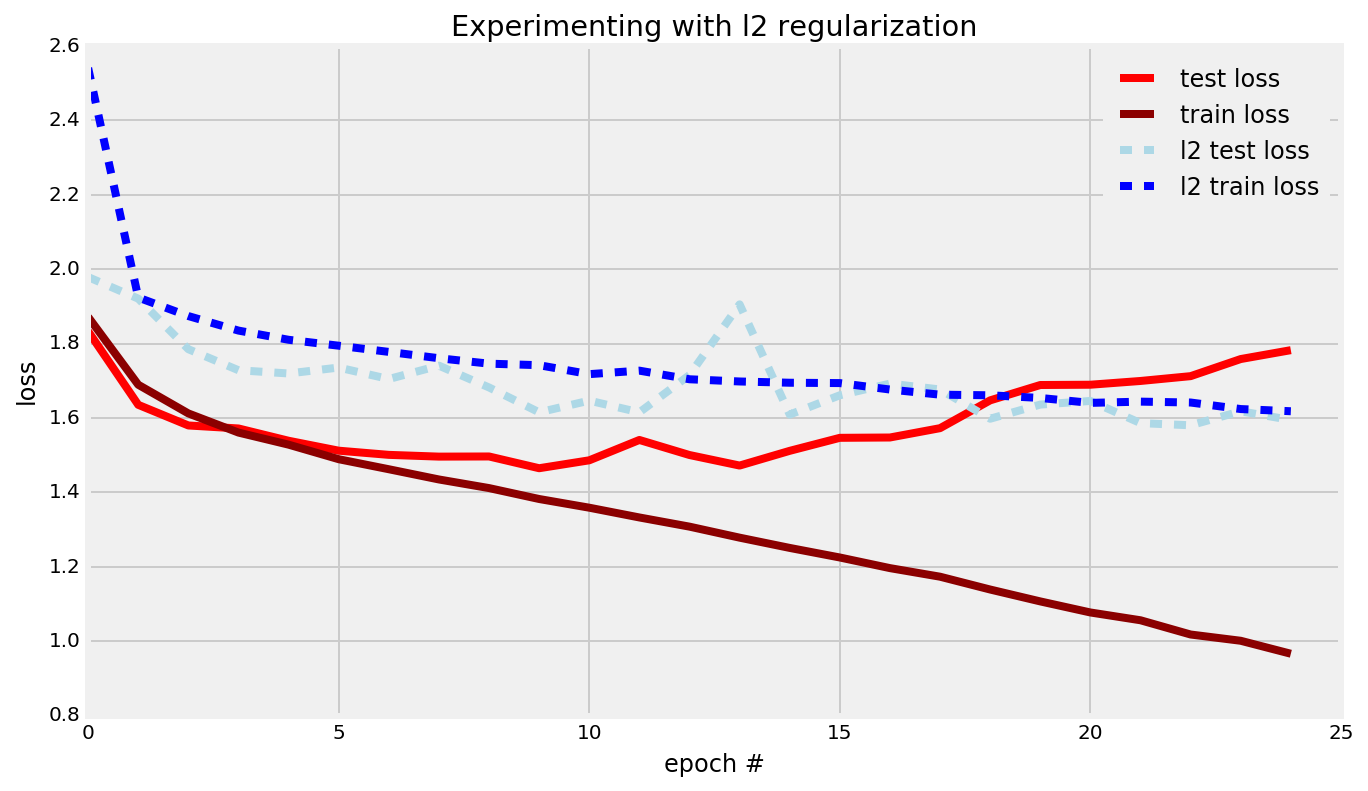

In [134]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn19", "epoch"], adam.loc[adam.model == "ffn19", "val_loss"],  color = "red")
ax.plot(adam.loc[adam.model == "ffn19", "epoch"], adam.loc[adam.model == "ffn19", "loss"], color = "darkred")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "val_loss"],  color = "lightblue", linestyle = "dashed")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "loss"], color = "blue" , linestyle = "dashed")
plt.legend(["test loss", "train loss", "l2 test loss", "l2 train loss"])
ax.set_xlabel('epoch #')
ax.set_ylabel('loss')
ax.set_title('Experimenting with l2 regularization')
plt.show()

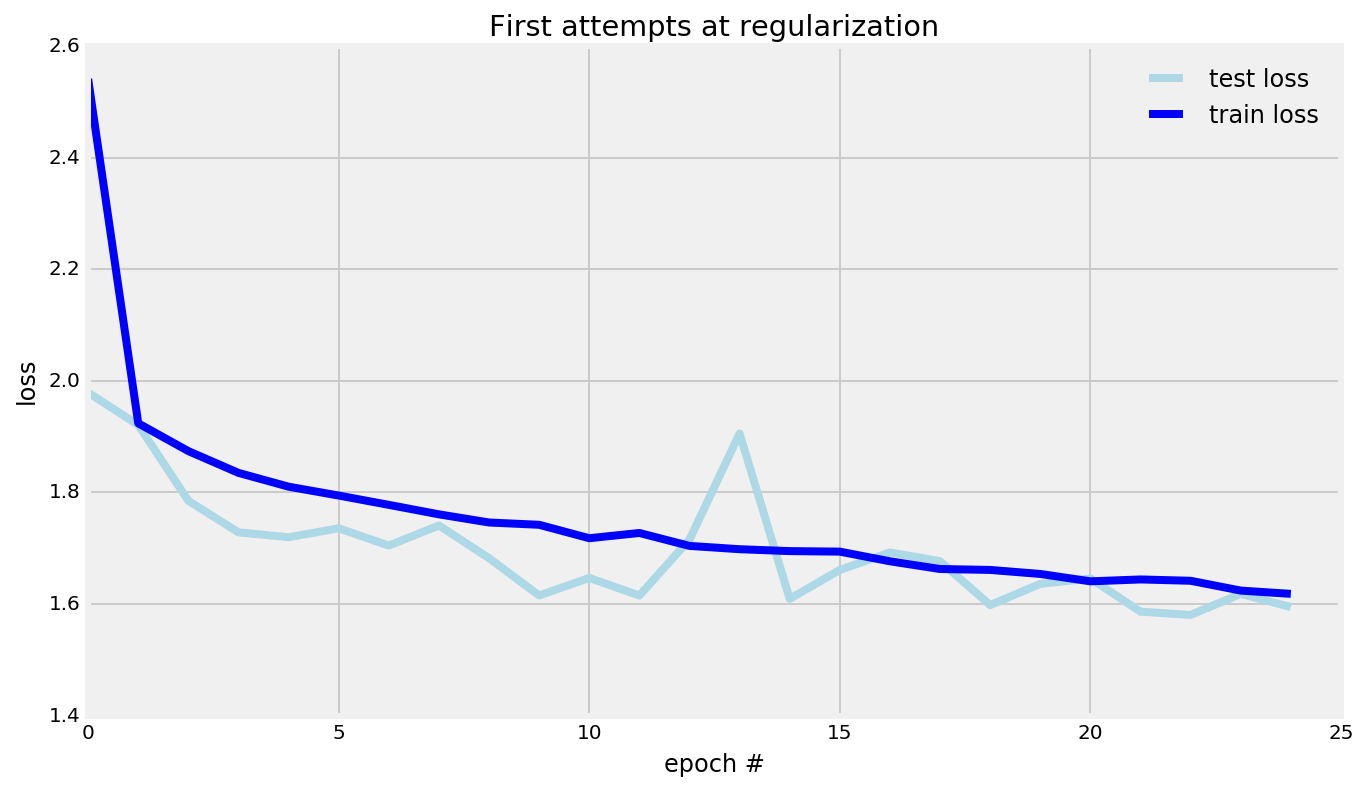

In [110]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "val_loss"],  color = "lightblue")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "loss"], color = "blue")

plt.legend(["test loss", "train loss"])
ax.set_xlabel('epoch #')
ax.set_ylabel('loss')
ax.set_title('First attempts at regularization')
plt.show()

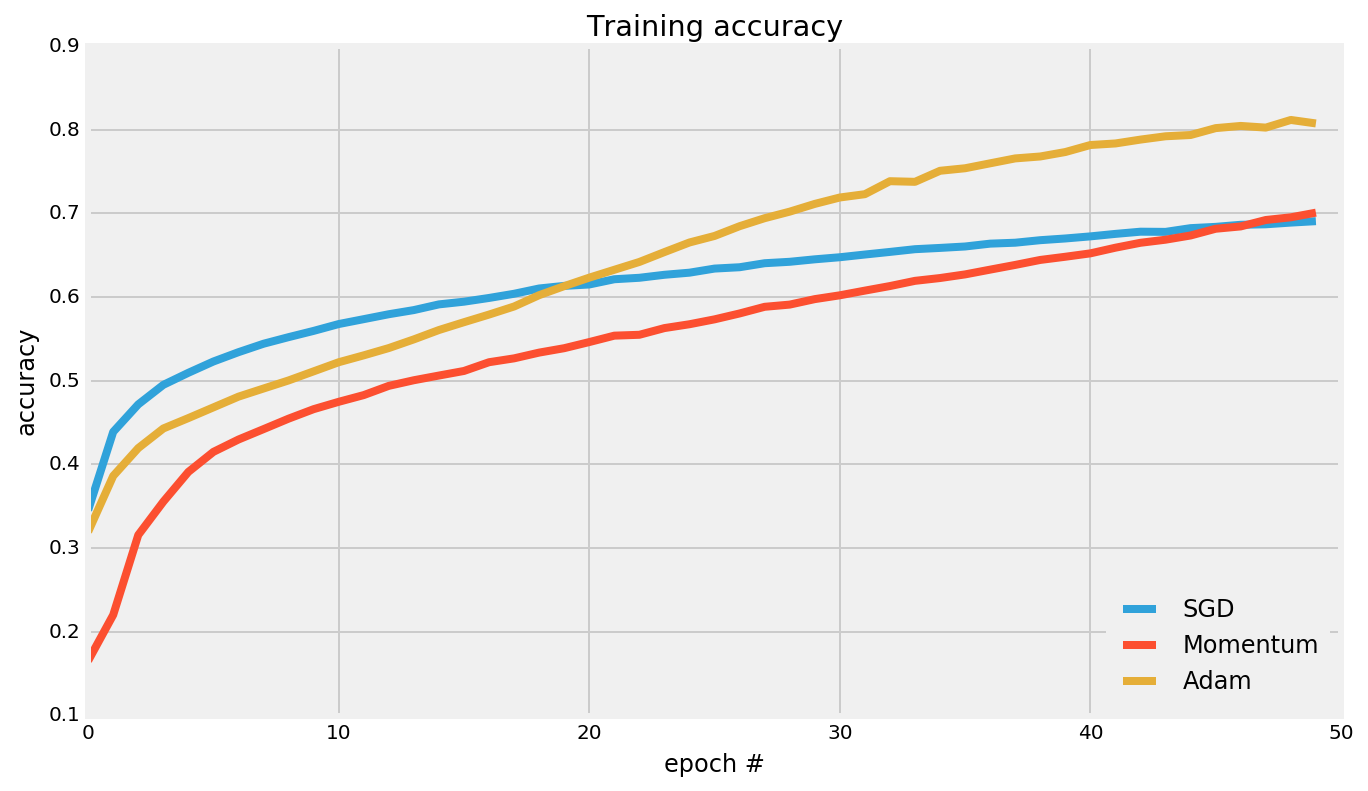

In [124]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn19", "epoch"], adam.loc[adam.model == "ffn19", "val_loss"],  color = "darkred")
ax.plot(adam.loc[adam.model == "ffn19", "epoch"], adam.loc[adam.model == "ffn19", "loss"], color = "red")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "val_loss"],  color = "lightblue")
ax.plot(adam.loc[adam.model == "ffn23", "epoch"], adam.loc[adam.model == "ffn23", "loss"], color = "blue")
plt.legend(["test loss", "train loss"])
ax.set_xlabel('epoch #')
ax.set_ylabel('loss')
ax.set_title('Overfitting the data with Adam')
plt.show()

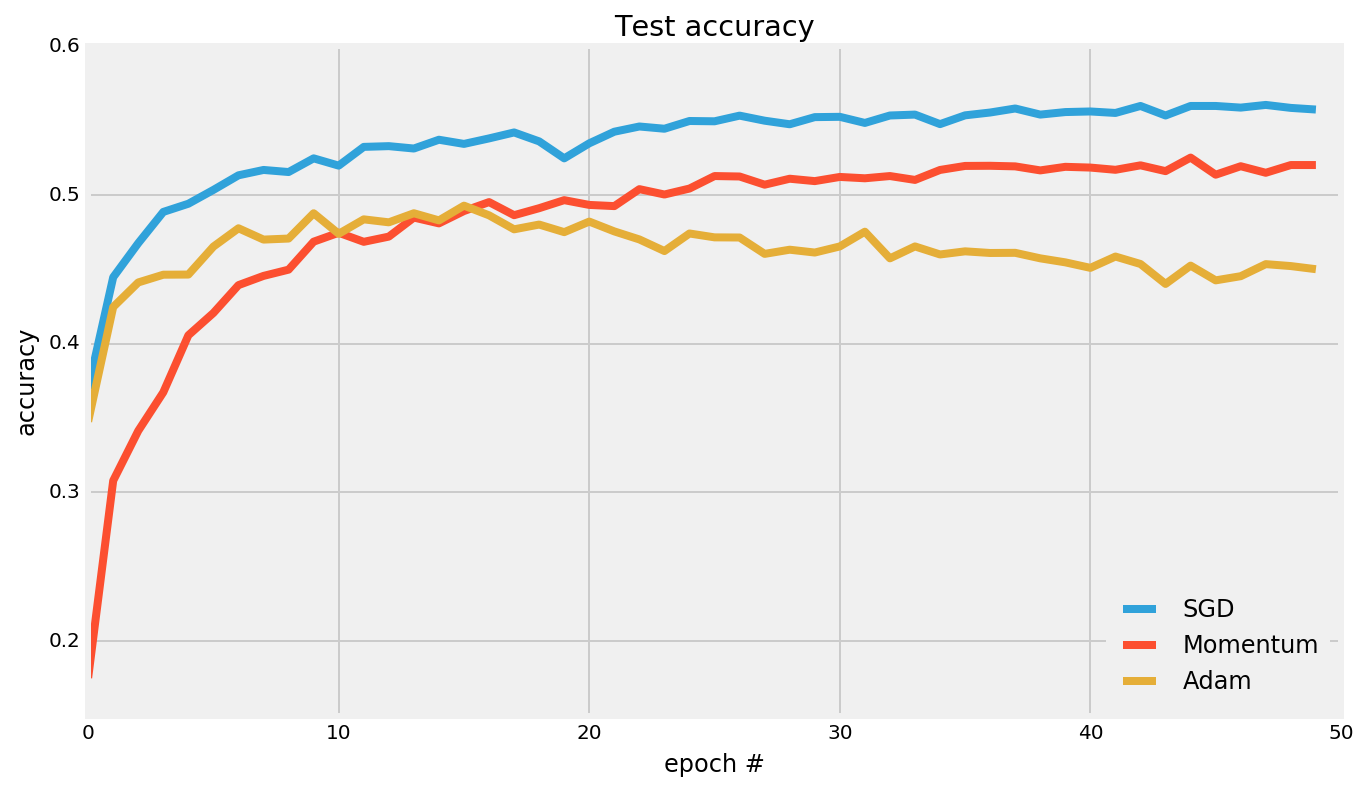

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn25", "epoch"], adam.loc[adam.model == "ffn25", "loss.1"])
ax.plot(adam.loc[adam.model == "ffn26", "epoch"], adam.loc[adam.model == "ffn26", "loss.1"])
ax.plot(adam.loc[adam.model == "ffn27", "epoch"], adam.loc[adam.model == "ffn27", "val_acc"])
plt.legend(["SGD", "Momentum", "Adam"], loc = "lower right")
ax.set_xlabel('epoch #')
ax.set_ylabel('accuracy')
ax.set_title('Test accuracy')
plt.show()


In [64]:
cnn = pd.read_csv("../csv_logs/log_cnn_v1.csv")
ffn = pd.read_csv("../csv_logs/log_ffn_adam.csv")
ffn.head()
cnn.head()

CParserError: Error tokenizing data. C error: Expected 15 fields in line 18, saw 16


NameError: name 'cnn' is not defined

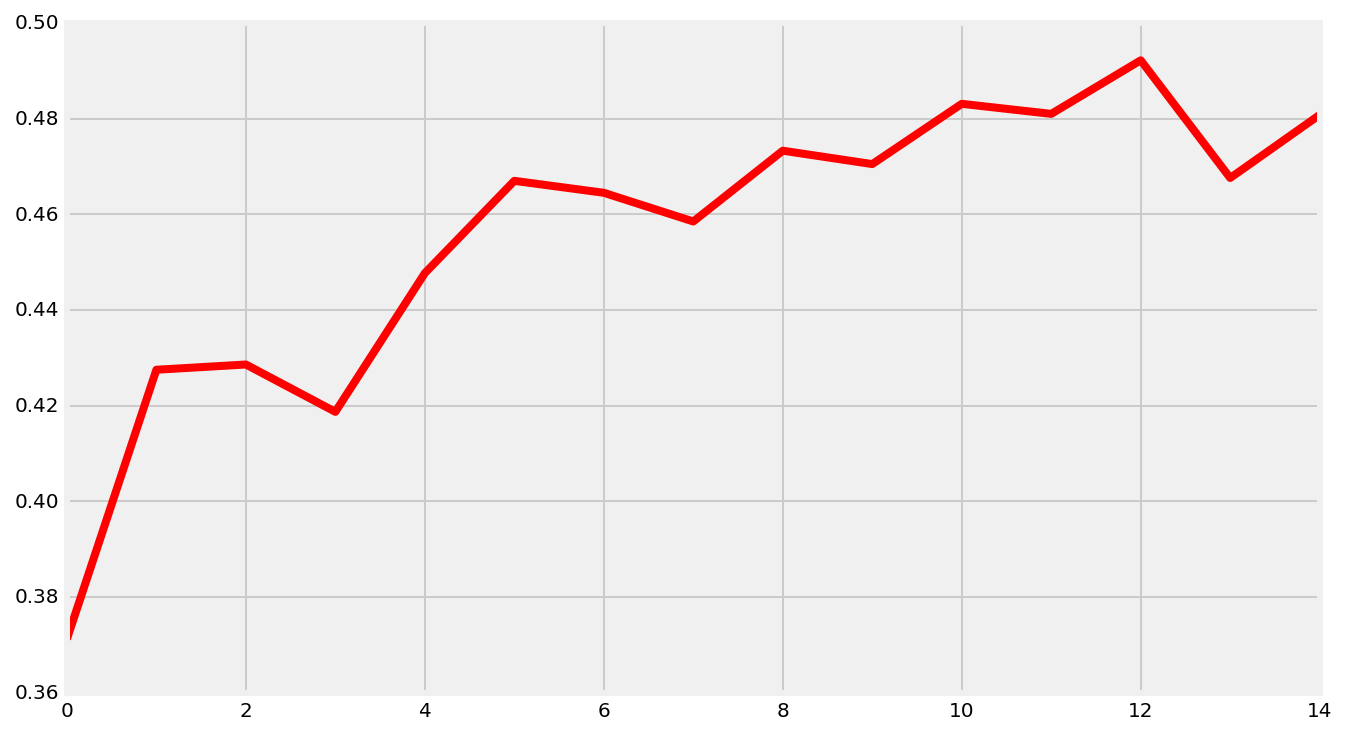

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(adam.loc[adam.model == "ffn39", "epoch"][:15], adam.loc[adam.model == "ffn39", "val_acc"][:15],  color = "red")
ax.plot(cnn.loc[cnn.model == "cnn3", "epoch"], cnn.loc[cnn.model == "cnn3", "val_acc"], color = "blue")
ax.plot(adam.loc[adam.model == "ffn36", "epoch"][:15], adam.loc[adam.model == "ffn36", "val_acc"][:15],  color = "red")
ax.set_ylim([0,1])
plt.legend(["feed forward", "CNN"], loc = "lower right")
ax.set_xlabel('epoch #')
ax.set_ylabel('val acc')
ax.set_title('Best FFN vs baseline CNN')
plt.show()

In [54]:
pd.read_csv("../csv_logs/ffn_depthcharts_adam.csv")

,epoch,model,param_count,time,layers,optimizer,loss,beta_1,epsilon,beta_2,lr,decay,acc,loss.1,val_acc,val_loss
0,0,model_1,1578506,04 Dec 2016 16:35:45,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,5.767335,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.245760,5.767335,0.312000,1.968751
1,1,model_1,1578506,04 Dec 2016 16:36:56,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,1.851871,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.348400,1.851871,0.369000,1.795082
2,2,model_1,1578506,04 Dec 2016 16:38:07,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,1.848535,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.348640,1.848535,0.352600,1.829549
3,3,model_1,1578506,04 Dec 2016 16:39:18,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,1.846495,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.351880,1.846495,0.327400,1.929878
4,4,model_1,1578506,04 Dec 2016 16:40:31,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,1.836914,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.357700,1.836914,0.382600,1.769347
5,5,model_1,1578506,04 Dec 2016 16:41:44,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,1.823835,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.361460,1.823835,0.360800,1.802763
6,6,model_1,1578506,04 Dec 2016 16:43:02,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,1.817076,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.366620,1.817076,0.355300,1.860057
7,7,model_1,1578506,04 Dec 2016 16:44:11,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,1.809853,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.367580,1.809853,0.308900,1.965577
8,8,model_1,1578506,04 Dec 2016 16:45:16,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,1.800074,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.373400,1.800074,0.370900,1.774213
9,9,model_1,1578506,04 Dec 2016 16:46:26,[<keras.layers.core.Dense object at 0x119eba49...,<keras.optimizers.Adam object at 0x121cc4790>,1.791237,0.8999999761581421,1.000000e-08,0.999,0.0010,0.00000,0.377200,1.791237,0.354200,1.853739


In [56]:
count_layers = lambda x: len(x.split(","))
#depthcharts["depth"] = depthcharts["layers"].map(count_layers)
#depthcharts["depth"] = depthcharts["depth"] - 1

depthcharts_adam["depth"] = depthcharts_adam["layers"].map(count_layers)
depthcharts_adam["depth"] = depthcharts_adam["depth"] - 1

depthcharts_adam_group = depthcharts_adam.groupby("model")["val_acc", "acc", "param_count", "depth"].max()
depthcharts_adam_group

,val_acc,acc,param_count,depth
model,,,,
model_0,1.847048,1.942135,30730,0
model_1,1.814717,1.967502,1578506,1
model_2,1.862996,1.991536,1841162,2
model_3,1.826736,1.970933,2103818,3
model_4,1.699122,1.834777,2366474,4
model_5,1.749692,1.848319,2629130,5
model_6,1.775220,1.952709,2629130,5


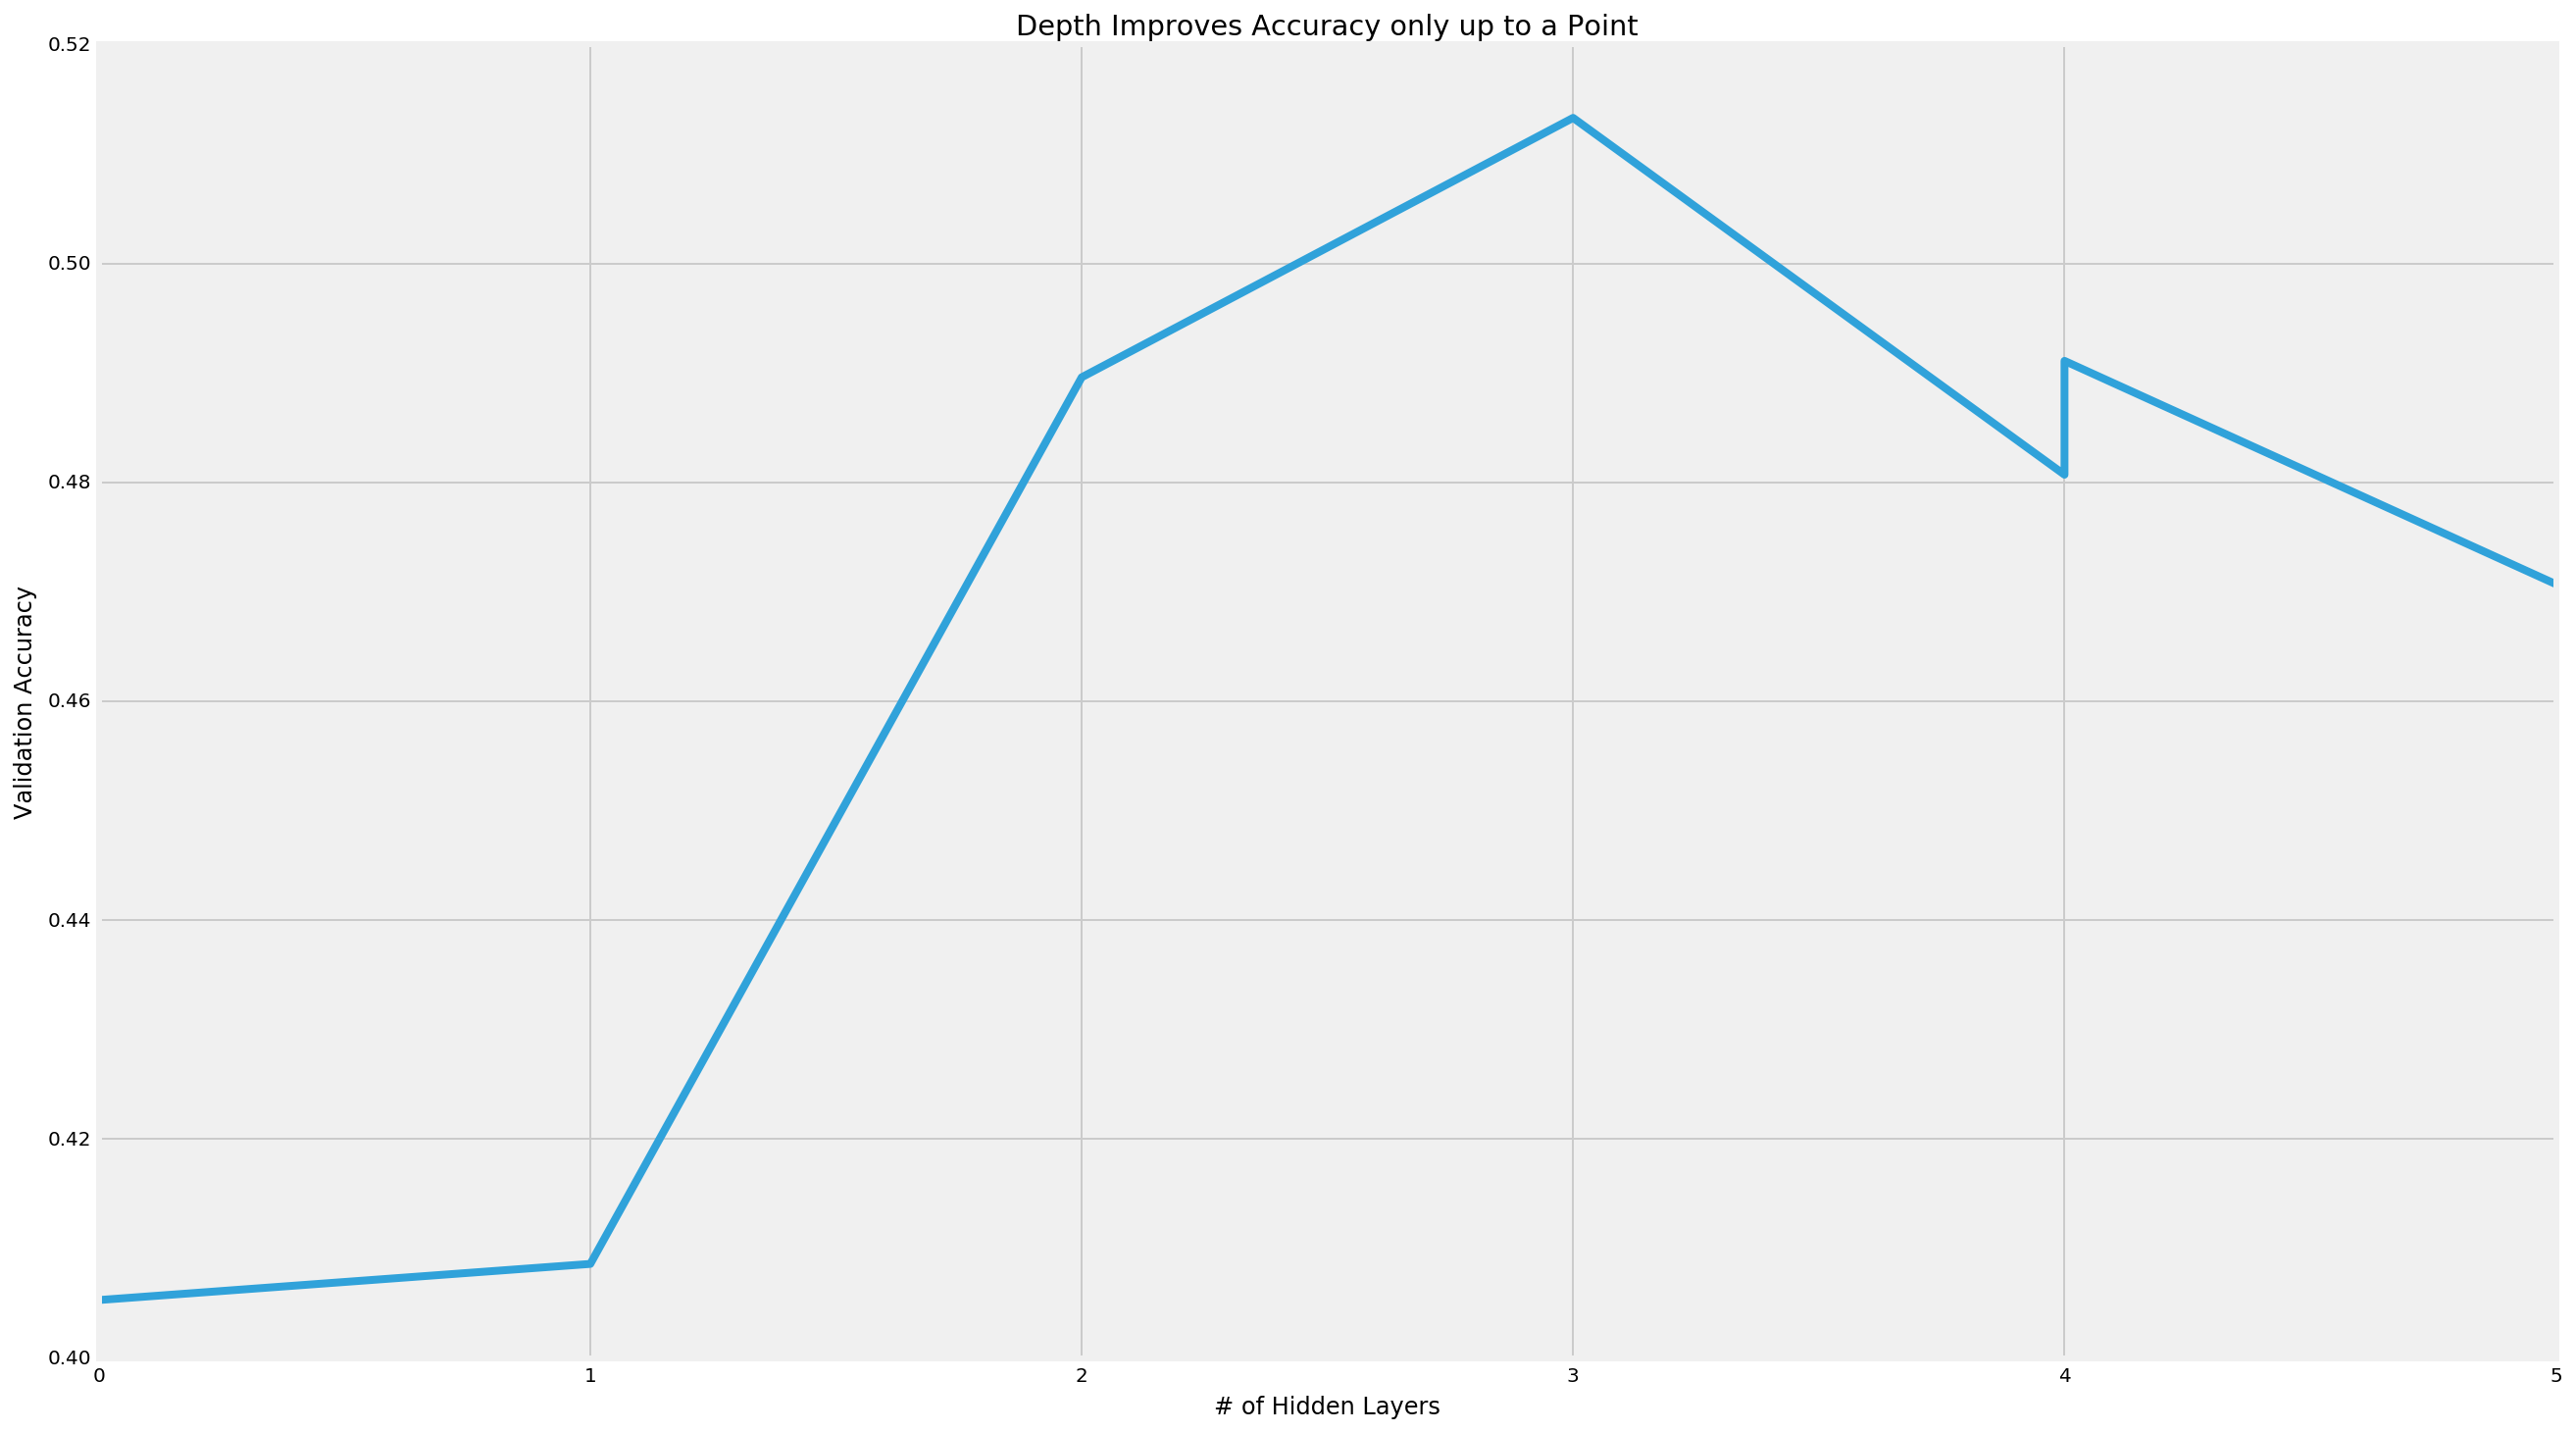

In [59]:
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(depthcharts_group["depth"], depthcharts_group["val_acc"])
ax.set_xlabel('# of Hidden Layers')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Depth Improves Accuracy only up to a Point')
plt.show()

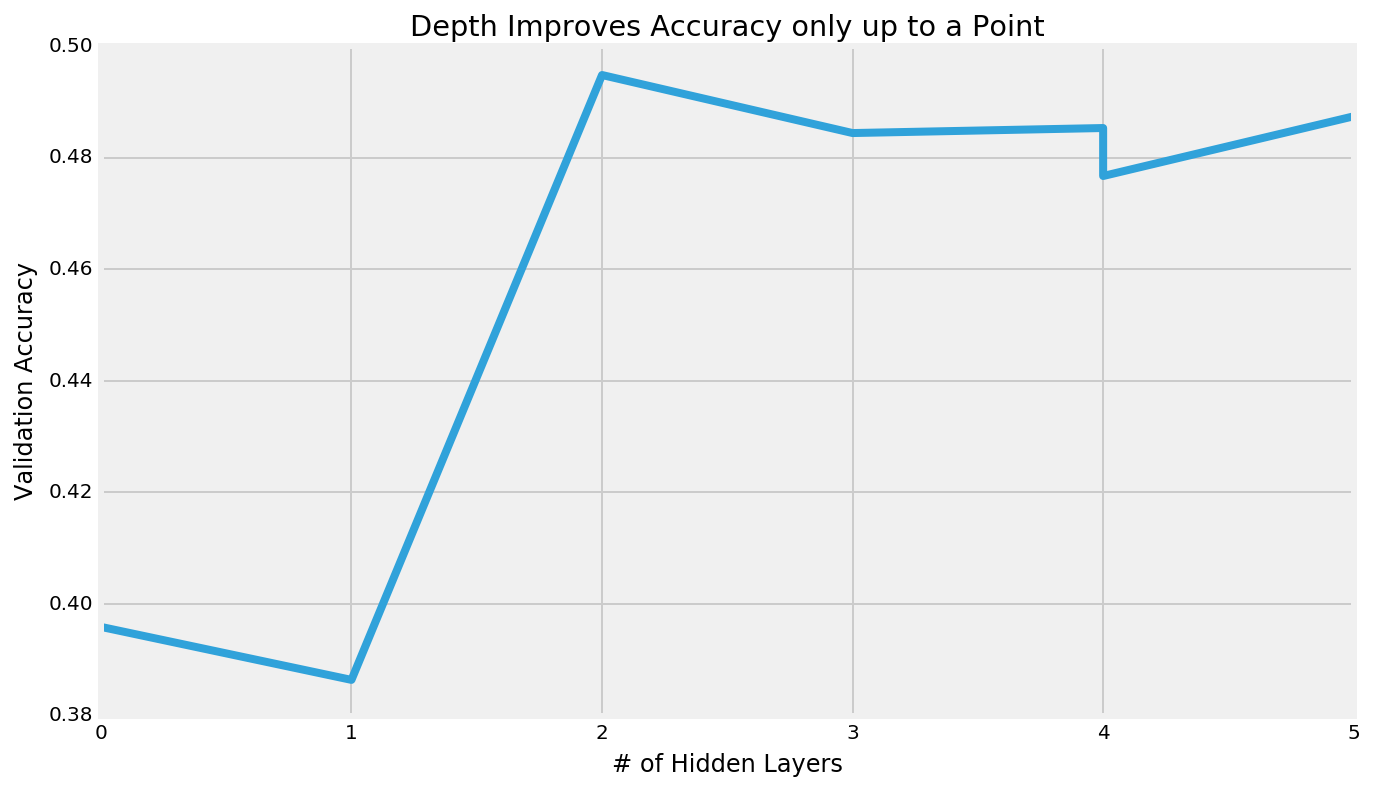

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(depthcharts_adam_group["depth"], depthcharts_adam_group["val_acc"])
ax.set_xlabel('# of Hidden Layers')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Depth Improves Accuracy only up to a Point')
plt.show()

In [41]:
depthcharts_adam["depth"].value_counts()

4    40
5    20
3    20
2    20
1    20
0    20
Name: depth, dtype: int64

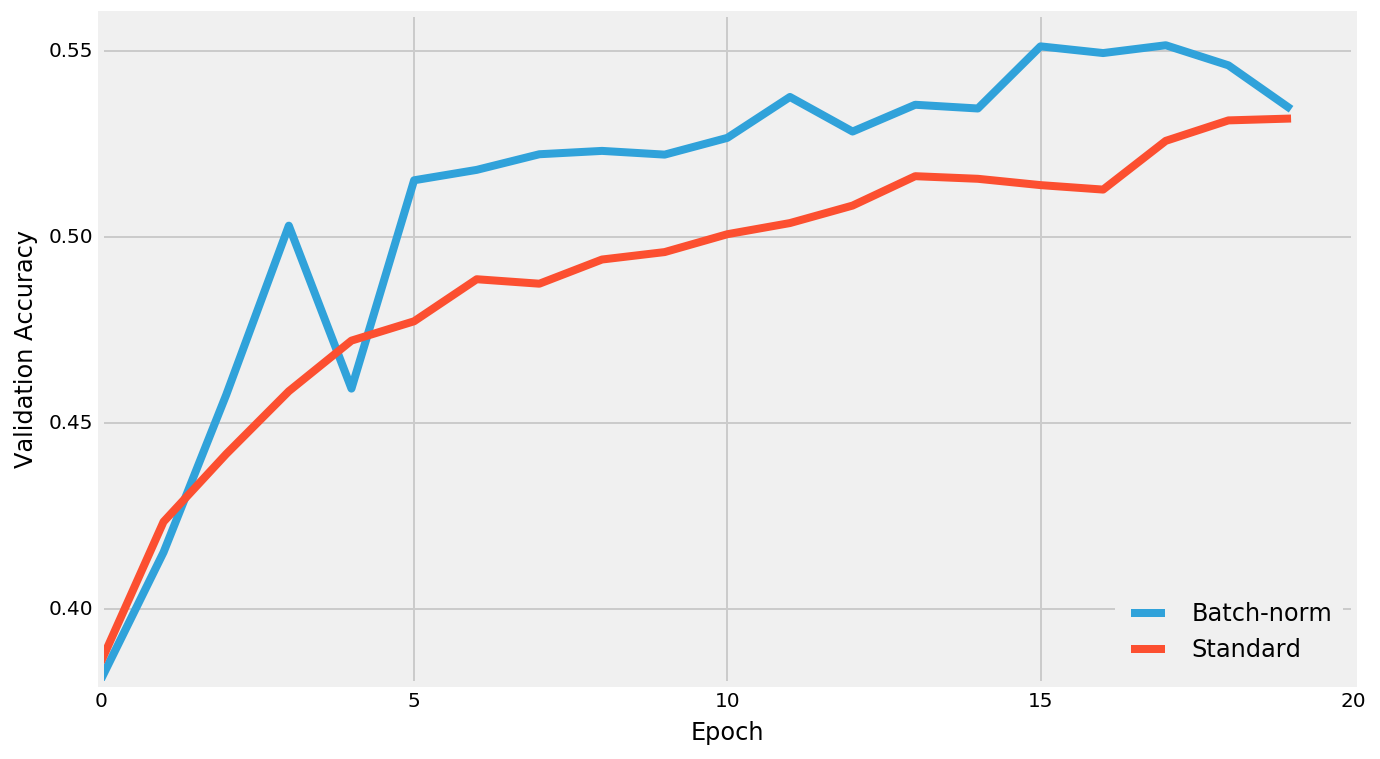

,epoch,model,param_count,time,layers,optimizer,loss,nesterov,lr,momentum,decay,acc,loss.1,val_acc,val_loss
0,0,model_3_batchnorm,2106890,06 Dec 2016 21:23:55,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.938249,False,0.01,0.9,0.0005,0.34420,1.938249,0.3811,1.748040
1,1,model_3_batchnorm,2106890,06 Dec 2016 21:24:55,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.616524,False,0.01,0.9,0.0005,0.43000,1.616524,0.4153,1.663177
2,2,model_3_batchnorm,2106890,06 Dec 2016 21:26:16,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.504378,False,0.01,0.9,0.0005,0.46620,1.504378,0.4576,1.535581
3,3,model_3_batchnorm,2106890,06 Dec 2016 21:29:40,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.422737,False,0.01,0.9,0.0005,0.49474,1.422737,0.5031,1.422618
4,4,model_3_batchnorm,2106890,06 Dec 2016 21:31:40,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.366846,False,0.01,0.9,0.0005,0.51508,1.366846,0.4593,1.535508
5,5,model_3_batchnorm,2106890,06 Dec 2016 21:32:57,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.315246,False,0.01,0.9,0.0005,0.53168,1.315246,0.5153,1.389780
6,6,model_3_batchnorm,2106890,06 Dec 2016 21:34:05,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.258274,False,0.01,0.9,0.0005,0.55542,1.258274,0.5181,1.386725
7,7,model_3_batchnorm,2106890,06 Dec 2016 21:35:08,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.210790,False,0.01,0.9,0.0005,0.56948,1.210790,0.5223,1.376459
8,8,model_3_batchnorm,2106890,06 Dec 2016 21:36:10,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.175911,False,0.01,0.9,0.0005,0.58446,1.175911,0.5232,1.368452
9,9,model_3_batchnorm,2106890,06 Dec 2016 21:37:11,[<keras.layers.core.Dense object at 0x119e92b9...,<keras.optimizers.SGD object at 0x121a1e890>,1.138476,False,0.01,0.9,0.0005,0.59788,1.138476,0.5222,1.363602


In [82]:
batchnorm = pd.read_csv("/Users/augustus/python/CIFAR/csv_logs/batchnorm_chart.csv")

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(batchnorm.loc[batchnorm["model"] == "model_3_batchnorm", "epoch"], batchnorm.loc[batchnorm["model"] == "model_3_batchnorm", "val_acc"])
ax.plot(batchnorm.loc[batchnorm["model"] == "model_3_standard", "epoch"], batchnorm.loc[batchnorm["model"] == "model_3_standard", "val_acc"])
plt.legend(["Batch-norm", "Standard"], loc = "lower right")
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Accuracy')
plt.show()
batchnorm

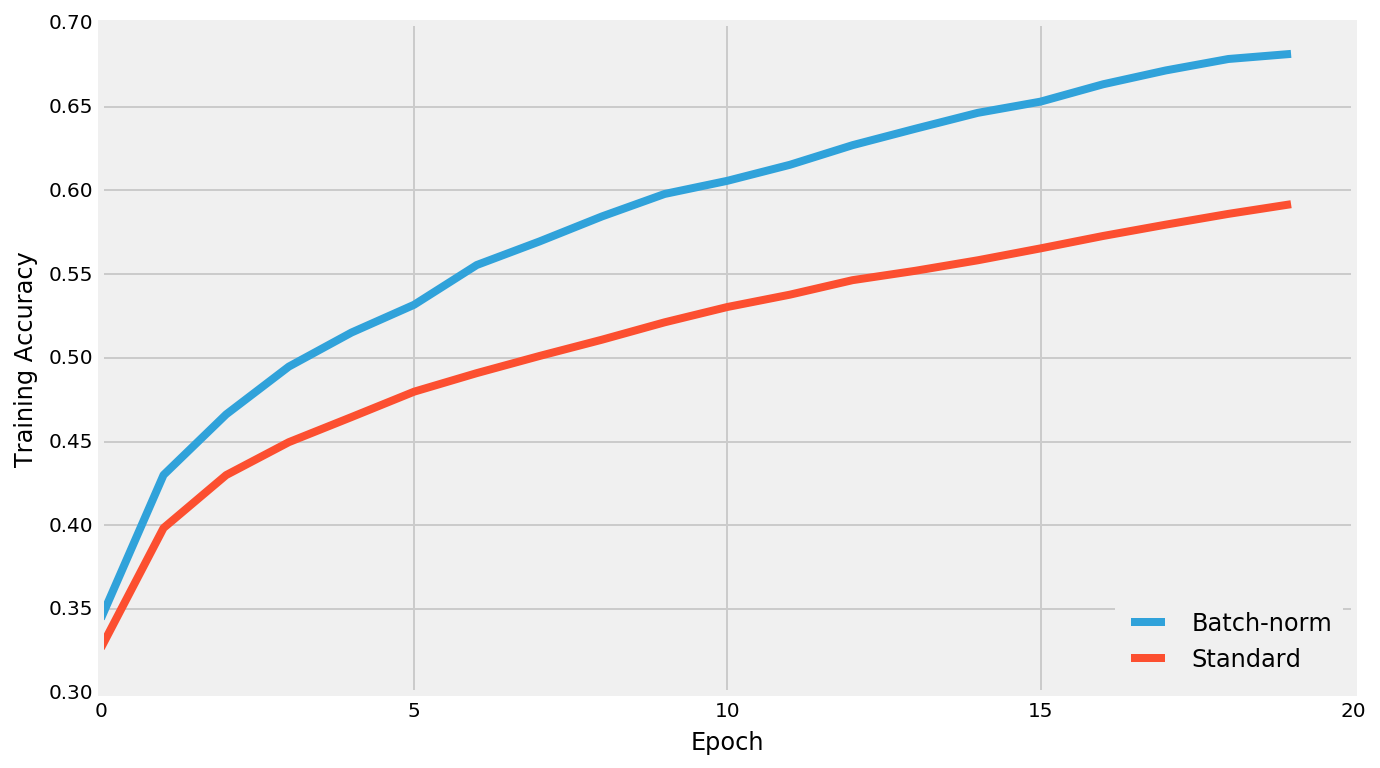

In [81]:
batchnorm = pd.read_csv("/Users/augustus/python/CIFAR/csv_logs/batchnorm_chart.csv")

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(batchnorm.loc[batchnorm["model"] == "model_3_batchnorm", "epoch"], batchnorm.loc[batchnorm["model"] == "model_3_batchnorm", "acc"])
ax.plot(batchnorm.loc[batchnorm["model"] == "model_3_standard", "epoch"], batchnorm.loc[batchnorm["model"] == "model_3_standard", "acc"])
plt.legend(["Batch-norm", "Standard"], loc = "lower right")
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Accuracy')
plt.show()
